In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [37]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/rahul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/rahul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/rahul/nltk_data...


True

In [52]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

In [2]:
# Step 1: Load the CSV Data
file_path = "LLM-KB.csv"
data = pd.read_csv(file_path)
print("Initial data:")
print(data.head())



Initial data:
             Timestamp                                              Title  \
0           14/06/2024  How to cut your city’s consumption-based emiss...   
1  14/06/2024 17:29:21          Mapped: Cities with a climate action plan   
2  14/06/2024 17:29:42     Greenhouse gas emissions interactive dashboard   
3  14/06/2024 17:31:12  How to shift your city’s investments from foss...   
4  14/06/2024 17:31:36                15-minute city initiatives explorer   

                                             Content  
0  Jump to:\nRelated Knowledge\nTo date, the focu...  
1  Jump to:\nRelated Knowledge\nCities are playin...  
2  Jump to:\nRelated Knowledge\nWith this dashboa...  
3  Jump to:\nRelated Knowledge\nCities around the...  
4  Jump to:\nRelated Knowledge\nThe 15-minute cit...  


In [3]:
# Step 2: Data Cleaning
print("\nChecking for missing values:")
print(data.isnull().sum())

# Drop rows with missing values if any
data.dropna(inplace=True)

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Reset index after dropping rows
data.reset_index(drop=True, inplace=True)

# Display data after cleaning
print("\nData after cleaning:")
print(data.head())


Checking for missing values:
Timestamp    0
Title        0
Content      0
dtype: int64

Data after cleaning:
             Timestamp                                              Title  \
0           14/06/2024  How to cut your city’s consumption-based emiss...   
1  14/06/2024 17:29:21          Mapped: Cities with a climate action plan   
2  14/06/2024 17:29:42     Greenhouse gas emissions interactive dashboard   
3  14/06/2024 17:31:12  How to shift your city’s investments from foss...   
4  14/06/2024 17:31:36                15-minute city initiatives explorer   

                                             Content  
0  Jump to:\nRelated Knowledge\nTo date, the focu...  
1  Jump to:\nRelated Knowledge\nCities are playin...  
2  Jump to:\nRelated Knowledge\nWith this dashboa...  
3  Jump to:\nRelated Knowledge\nCities around the...  
4  Jump to:\nRelated Knowledge\nThe 15-minute cit...  


In [4]:
# Display the total number of rows after cleaning
print("\nTotal number of rows after cleaning:", data.shape[0])


Total number of rows after cleaning: 790


In [56]:
# Step 3: Text Preprocessing
def preprocess_text(text):
    # Remove specific text
    text = text.replace("Jump to:\nRelated Knowledge\n", "")
    # Remove specific text
    text = text.replace("Show References and Credits", "")
    # # Remove HTML tags
    # text = re.sub(r'<.*?>', '', text)
    # # Remove special characters and numbers
    # text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Rejoin tokens into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

data['Content'] = data['Content'].apply(preprocess_text)
print("\nData after text preprocessing:")
print(data.head())


Data after text preprocessing:
             Timestamp                                              Title  \
0           14/06/2024  How to cut your city’s consumption-based emiss...   
1  14/06/2024 17:29:21          Mapped: Cities with a climate action plan   
2  14/06/2024 17:29:42     Greenhouse gas emissions interactive dashboard   
3  14/06/2024 17:31:12  How to shift your city’s investments from foss...   
4  14/06/2024 17:31:36                15-minute city initiatives explorer   

                                             Content  
0  date , focus necessary foundation climate plan...  
1  city playing lead role cutting greenhouse gas ...  
2  dashboard , explore historical greenhouse gas ...  
3  city around world building better financial st...  
4  15-minute city urban planning concept strives ...  


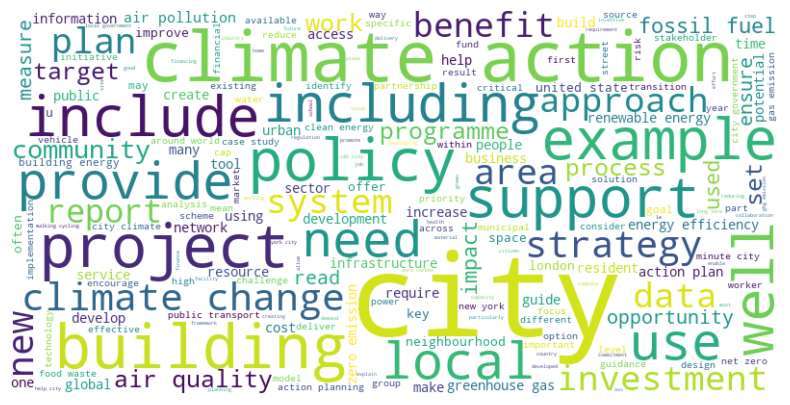

In [58]:
# Step 4: Exploratory Data Analysis (EDA)
text = ' '.join(data['Content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [59]:
print("\nNumber of documents:", len(data))
print("Average document length:", data['Content'].apply(len).mean())



Number of documents: 790
Average document length: 4163.651898734177


In [60]:
# Step 5: Save Cleaned Data
cleaned_file_path = "Cleaned_LLM_KB.csv"
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to {cleaned_file_path}")


Cleaned data saved to Cleaned_LLM_KB.csv


In [ ]:
def remove_specific_text(text):
    # Remove specific text
    text = text.replace("Jump to:\nRelated Knowledge\n", "")
    text = text.replace("Show References and Credits", "")
    return text